In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/원본data.csv',index_col=0)
df_origin=pd.read_csv('/content/drive/MyDrive/datasets/원본data.csv',index_col=0)

In [ ]:
## 경제심리지수, 기계류내수출,수출입물가비율 ,장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

df['재고순환지표']+=25
df['재고순환지표']=np.log1p(df['재고순환지표']/df['재고순환지표'].shift(1))
df['건설수주액']=np.log1p(df['건설수주액']/df['건설수주액'].shift(1))
df['코스피']=np.log1p(df['코스피']/df['코스피'].shift(1))
df['원엔']=np.log1p(df['원엔']/df['원엔'].shift(1))
df['원위안']=np.log1p(df['원위안']/df['원위안'].shift(1))
df['CD']=np.log1p(df['CD']/df['CD'].shift(1))
df['유가']=np.log1p(df['유가']/df['유가'].shift(1))
df['미장단기']+=0.9
df['미장단기']=np.log1p(df['미장단기']/df['미장단기'].shift(1))
df['거래량']=np.log1p(df['거래량']/df['거래량'].shift(1))
df['구리']=np.log1p(df['구리']/df['구리'].shift(1))
df['은']=np.log1p(df['은']/df['은'].shift(1))
df['금']=np.log1p(df['금']/df['금'].shift(1))

df['종가']=np.log(df['종가']/df['종가'].shift(1))
df=df.dropna(axis=0)


In [ ]:
df.drop(['유가','은','원위안','외환보유액'],axis=1,inplace=True)

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.statespace.varmax import VARMAX
# import itertools

# # 임의의 데이터 생성

# data=df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
# exog=df.iloc[:147][['뉴스심리지수','천연가스']]


In [ ]:
# # p, q 값 범위 설정
# p = range(0, 3)  # 예를 들어, 최대 2차까지 고려
# q = range(0, 3)  # 예를 들어, 최대 2차까지 고려

# # 가능한 모든 p, q 조합 생성
# pq_combinations = list(itertools.product(p, q))
# pq_combinations.remove((0,0))

# # AIC, BIC를 저장할 리스트
# aic_values = []
# bic_values = []

# # 모든 (p, q) 조합에 대해 VARMAX 모델을 적합
# for order in pq_combinations:
#     try:
#         model = VARMAX(data, exog=exog, order=order)
#         model_fit = model.fit(disp=False)
#         aic_values.append(model_fit.aic)
#         bic_values.append(model_fit.bic)
#     except:
#         continue

# # 최소 AIC, BIC 값을 가지는 (p, q) 찾기
# min_aic_index = aic_values.index(min(aic_values))
# min_bic_index = bic_values.index(min(bic_values))

# optimal_pq_aic = pq_combinations[min_aic_index]
# optimal_pq_bic = pq_combinations[min_bic_index]

# print(f'Optimal (p, q) based on AIC: {optimal_pq_aic}')
# print(f'Optimal (p, q) based on BIC: {optimal_pq_bic}')

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

# train 데이터 프레임 정의
train_data = df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
train_exog = df.iloc[:147][['뉴스심리지수','천연가스']]
train = pd.DataFrame(train_data)
train_exog = pd.DataFrame(train_exog)

# test 데이터 프레임 정의
test_data = df.iloc[147:][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
test_exog = df.iloc[147:][['뉴스심리지수','천연가스']]
test = pd.DataFrame(test_data)
test_exog = pd.DataFrame(test_exog)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VARMAX model
    model_varmax = VARMAX(endog=train, exog=train_exog, order=(1, 0))
    model_fit = model_varmax.fit(disp=False)

    # One step forecast
    forecast = model_fit.forecast(steps=1, exog=test_exog.iloc[[t]])

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)
    train_exog = pd.concat([train_exog, test_exog.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: ignored

In [ ]:
pred['date']= test.index
pred=pred.set_index('date')

In [ ]:
show=pd.concat([pred['종가'],test['종가']], axis=1, keys=['예측', '실제'])


In [ ]:
a=df_origin[148:][['종가']]
show=pd.concat([show,a],axis=1).rename(columns={'종가':'실제종가'})
b=df_origin[147:-1]['종가'].values * np.exp(show['예측'].values)
show['예측종가']=b
show.rename(columns={0 : '예측종가'},inplace=True)
show


,예측,실제,실제종가,예측종가
2020-05,-0.026037,0.116203,1047.710000,908.797336
2020-06,0.057012,0.098670,1156.360000,1109.177556
2020-07,0.103584,-0.033584,1118.170000,1282.563430
2020-08,0.041215,0.081749,1213.420000,1165.218537
2020-09,0.020520,0.160504,1424.680000,1238.575993
2020-10,0.027745,0.030546,1468.870000,1464.761360
2020-11,0.069401,-0.035161,1418.120000,1574.431144
2020-12,0.052517,0.096859,1562.350000,1494.585376
2021-01,0.036873,0.102901,1731.680000,1621.034536
2021-02,-0.013419,0.124357,1960.990000,1708.598577


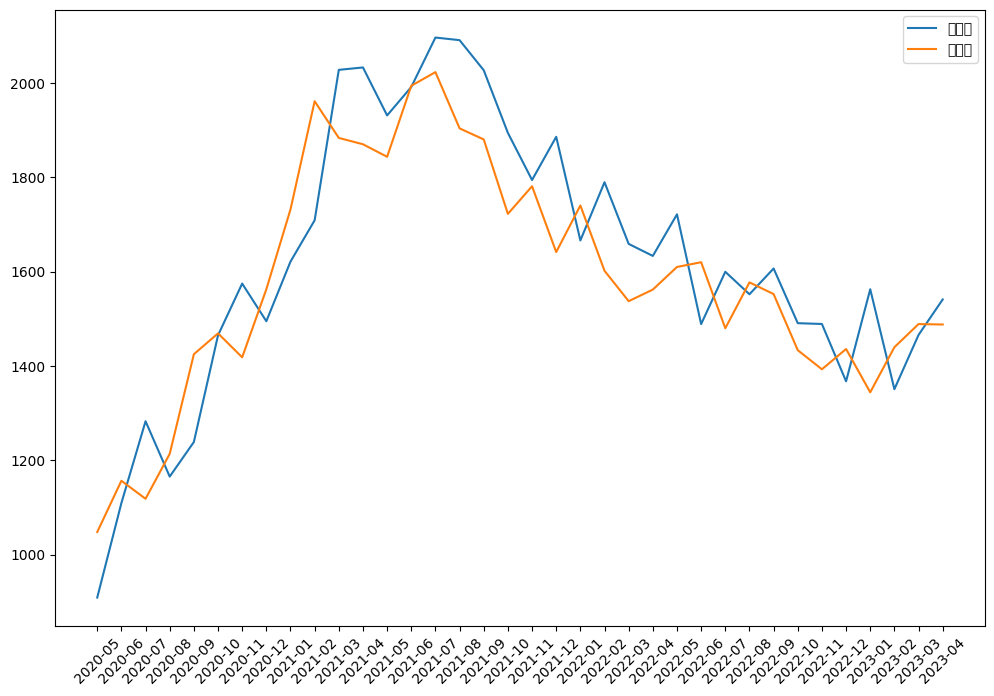

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(show.index, show['예측종가'],label='예측값')
plt.plot(show.index, show['실제종가'],label='실제값')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(show['실제종가'],show['예측종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(show['실제종가'], show['예측종가'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 108.658173
MSE: 16141.307235
RMSE: 127.048444


In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

# train 데이터 프레임 정의
train_data = df.iloc[:147][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
train_exog = df.iloc[:147][['뉴스심리지수','천연가스']]
train = pd.DataFrame(train_data)
train_exog = pd.DataFrame(train_exog)

# test 데이터 프레임 정의
test_data = df.iloc[147:][['재고순환지표','경제심리지수','수출입물가비율','코스피','장단기','원달러','CD','G20','미장단기','거래량','구리','종가']]
test_exog = df.iloc[147:][['뉴스심리지수','천연가스']]
test = pd.DataFrame(test_data)
test_exog = pd.DataFrame(test_exog)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VARMAX model
    model_varmax = VARMAX(endog=train, exog=train_exog, order=(1, 0))
    model_fit = model_varmax.fit(disp=False, method="powell")

    # One step forecast
    forecast = model_fit.forecast(steps=1, exog=test_exog.iloc[[t]])

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)
    train_exog = pd.concat([train_exog, test_exog.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)
